In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [355]:
from itertools import combinations

In [7]:
def display(img):
    plt.imshow(img, 'gray')
    plt.show()

In [544]:
def gt_union(gr_t, img_shape):
    
    union_list = []
    final_union_list = []
    
    for k in range (gr_t.__len__()):
        union_list.append([])
    
    for i in range(gr_t.__len__()):
        ax1 = gr_t[i][0]
        ay1 = gr_t[i][1]
        ax2 = gr_t[i][2] + gr_t[i][0]
        ay2 = gr_t[i][3] + gr_t[i][1]
        
        for j in range(gr_t.__len__()):
                bx1 = gr_t[j][0]
                by1 = gr_t[j][1]
                bx2 = gr_t[j][2] + gr_t[j][0]
                by2 = gr_t[j][3] + gr_t[j][1]
                
                s1 = ( ax1>=bx1 and ax1<=bx2 ) or ( ax2>=bx1 and ax2<=bx2 )
                s2 = ( ay1>=by1 and ay1<=by2 ) or ( ay2>=by1 and ay2<=by2 )
                s3 = ( bx1>=ax1 and bx1<=ax2 ) or ( bx2>=ax1 and bx2<=ax2 )
                s4 = ( by1>=ay1 and by1<=ay2 ) or ( by2>=ay1 and by2<=ay2 )
                
                if ((s1 or s3) and (abs(ay1 - by2) < .07 * img_shape[0] or abs(by1 - ay2) < .07 * img_shape[0])) or ((abs(ax1 - bx2) < .05 * img_shape[1] or abs(bx1 - ax2) < .05 * img_shape[1]) and (s2 or s4)): 
                        union_list[i].append(gr_t[j])
    
    for k1 in range (union_list.__len__()):
        union_list[k1].append((gr_t[k1]))
        
    comb_list = []
    
    for e in range(union_list.__len__()):
        for it in range(2, union_list[e].__len__() + 1):
            comb = list(combinations(union_list[e], it))
            for it1 in range(comb.__len__()):
                for it2 in range(comb[it1].__len__()):
                    if comb[it1][it2] == gr_t[e]:
                        comb_list.append(list(comb[it1]))
                        
         
    
    for e in range(union_list.__len__()):     
        for r in range(union_list.__len__()):
            if list(set(union_list[e]) & set(union_list[r])) != []:
                comb_list.append(list(set(union_list[e] + union_list[r])))
    grt = []            
    for i in range(gr_t.__len__()):
        grt.append(gr_t[i])

                
    a =  [list(x) for x in set(tuple(x) for x in (comb_list + union_list))]
    
    x1_list = []
    y1_list = []
    x2_list = []
    y2_list = []

    for k0 in range (a.__len__()):
        x1_list.append([])
        y1_list.append([])
        x2_list.append([])
        y2_list.append([])   

    for k2 in range (a.__len__()):
        for ik in range(a[k2].__len__()):
            x1_list[k2].append(a[k2][ik][0])
            y1_list[k2].append(a[k2][ik][1])
            x2_list[k2].append(a[k2][ik][2] + a[k2][ik][0])
            y2_list[k2].append(a[k2][ik][3] + a[k2][ik][1])

    for k3 in range (a.__len__()):
        left = min(x1_list[k3])
        bottom = min(y1_list[k3])
        right = max(x2_list[k3])
        top = max(y2_list[k3])
        
        final_union_list.append((left, bottom, right - left, top - bottom))
           
        
    unique_conts = [list(x) for x in set(tuple(x) for x in (final_union_list + gr_t))]
    
    unique_conts = [tuple(x) for x in unique_conts]
    
    new_conts = list(set(unique_conts) - set(gr_t))    

    d_union_conts = {}

    for i in range(new_conts.__len__()):
        val = []
        for j in range(gr_t.__len__()):
            if inside(new_conts[i], gr_t[j]):
                val.append(gr_t[j])
        d_union_conts[new_conts[i]] = val
        
    return unique_conts, d_union_conts


In [545]:
def inside(big, small):
    if big[0] <= small[0] and big[0] + big[2] >= small[0] + small[2] and big[1] <= small[1] and big[1] + big[3] >= small[1]+ small[3]:
        return True
    else:
        return False

In [138]:
def intersecting_detect(fir, sec, near = False):

    a = False
    
    ax1 = fir[0]
    ay1 = fir[1]
    ax2 = fir[2] + fir[0]
    ay2 = fir[3] + fir[1]

    bx1 = sec[0]
    by1 = sec[1]
    bx2 = sec[2] + sec[0]
    by2 = sec[3] + sec[1]

    
    
    s1 = ( ax1>=bx1 and ax1<=bx2 ) or ( ax2>=bx1 and ax2<=bx2 )
    s2 = ( ay1>=by1 and ay1<=by2 ) or ( ay2>=by1 and ay2<=by2 )
    s3 = ( bx1>=ax1 and bx1<=ax2 ) or ( bx2>=ax1 and bx2<=ax2 )
    s4 = ( by1>=ay1 and by1<=ay2 ) or ( by2>=ay1 and by2<=ay2 )

    if ((s1 and s2) or (s3 and s4)) or ((s1 and s4) or (s3 and s2)):
        a = True
        return a
        
    elif near:
        if (s1 or s3) and (abs(ay1 - by2) < 35 or abs(by1 - ay2) < 35):
            a = True
            return a
        
        if (abs(ax1 - bx2) < 12 or abs(bx1 - ax2) < 12) and (abs(ay1 - by2) < 22 or abs(by1 - ay2) < 22): 
            a = True
            return a
    else:
        return False

In [614]:
def getIoU(gr_t, gr_w_uni, dict_conts, cont, img_shape):
    
    
    
#   gr_t: X,Y,W,H
#   cont: X,Y,X+W,Y+H

    table = np.zeros((gr_t.__len__(), cont.__len__()))
    
    
    for i, gr in enumerate(gr_w_uni):
        
#         if gr[2]*gr[3] > .015 * img_shape[0]*img_shape[1]:
#             thhold_iou = .5
#             thhold_i = 0
#         else:
#             thhold_iou = .23
#             thhold_i = .66
#         print(table)
        for j, ct in enumerate(cont):
            if intersecting_detect(gr, ct):
                if list(set(list(dict_conts.keys())) & set({gr})) != []:
                    inDict = dict_conts[gr]

                    idx_list = []

                    for k in range(inDict.__len__()):
                        idx_list.append(list(gr_t).index(inDict[k]))
#                              ??????
                    sq =0
                    for k in (idx_list):
                        left = max(gr_t[k][0], ct[0])
                        top = min(gr_t[k][3] + gr_t[k][1], ct[3] + ct[1])
                        right = min(gr_t[k][2] + gr_t[k][0], ct[2] + ct[0])
                        bottom = max(gr_t[k][1], ct[1])
                        
                        sq += (right - left) * (top - bottom)
                        
                    s1 = gr[2] * gr[3]
                    s2 = ct[2] * ct[3]

                    s_12_union = s1 + s2 - sq
                    
                    for k in (idx_list):
                        table[k][j] = max(table[k][j], sq / s_12_union)
                        
                        
                
                else:
#               Пересечение

                    left = max(gr[0], ct[0])
                    top = min(gr[3] + gr[1], ct[3] + ct[1])
                    right = min(gr[2] + gr[0], ct[2] + ct[0])
                    bottom = max(gr[1], ct[1])

                    s0 = (right - left) * (top - bottom)

                    #                Объединение

                    s1 = gr[2] * gr[3]
                    s2 = ct[2] * ct[3]

                    s_12_union = s1 + s2 - s0

                    l = gr_t.index(gr)

                    table[l][j] = max(table[l][j], s0 / s_12_union)

    
    return table

In [91]:
def painting(cont_list, image, alt_colour = False):
    copy_img = image.copy()
    if alt_colour == False:
        for i in range(cont_list.__len__()):
            cv2.rectangle(copy_img, (cont_list[i][0], cont_list[i][1]), (cont_list[i][0] + cont_list[i][2], cont_list[i][1] + cont_list[i][3]), (255, 0, 0), 2)
            
    else:
        for i in range(cont_list.__len__()):
            cv2.rectangle(copy_img, (cont_list[i][0], cont_list[i][1]), (cont_list[i][0] + cont_list[i][2], cont_list[i][1] + cont_list[i][3]), (0, 0, 255), 2)
         

    return copy_img

In [616]:
def main_metric(gr_t, cont, size = (480, 640)):
    conts, dict_conts = gt_union(gr_t, size)
    table = getIoU(gr_t, conts, dict_conts, cont, size)
    
    return table

In [617]:
main_metric(gt_list, cont_list)

array([[0.20670391, 0.        , 0.        , 0.        , 0.        ],
       [0.37618637, 0.        , 0.        , 0.        , 0.        ],
       [0.37618637, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.27419355, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.21108179, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.12071535, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.51404853]])

In [49]:
image= cv2.imread("/Users/macuha/Desktop/white.png")
image0 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

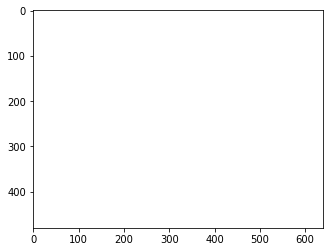

In [90]:
display(image)

In [618]:
image_ = image.copy()
for i in r:
    cv2.rectangle(image_, (i[0], i[1]), (i[0] + i[2], i[1] + i[3]), (255,0,0), 2)

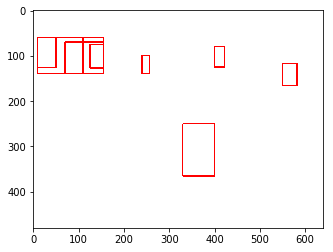

In [619]:
display(image_)

In [385]:
gt_list = [ (10, 60, 40, 66),
    (70, 70, 40, 70),
    (125, 75, 30, 52), (240, 100, 17, 40), (400, 80, 22, 45), (550, 117, 32, 49), (330, 250, 70, 115)]

In [342]:
cont_list = [(60, 50, 100, 100), (235, 95, 40, 62), (360, 60, 60, 60), (570, 139, 32, 45), (320, 235, 108, 145)]